# Initialisation du Notebook

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
from sklearn.model_selection import train_test_split

Récupération du jeu de données:

In [4]:
!wget https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/titanic/train.csv

--2024-02-18 15:41:16--  https://raw.githubusercontent.com/datacorner/les-tutos-datacorner.fr/master/datasources/titanic/train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61194 (60K) [text/plain]
Saving to: ‘train.csv’

train.csv           100%[===================>]  59.76K  --.-KB/s    in 0.001s  

2024-02-18 15:41:16 (93.6 MB/s) - ‘train.csv’ saved [61194/61194]



In [5]:
titanic = pd.read_csv("train.csv")
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# One-Hot encoding

In [6]:
display(titanic.columns)
cols = ['Sex', 'Embarked']
for col in cols:
    display('Column: ' + col)
    display(titanic[col].value_counts())
data_dummies = pd.get_dummies(titanic,
                              prefix=['S', 'E'],
                              columns=['Sex', 'Embarked'])
display(data_dummies.columns)
data_dummies.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

'Column: Sex'

male      577
female    314
Name: Sex, dtype: int64

'Column: Embarked'

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'S_female', 'S_male', 'E_C', 'E_Q', 'E_S'],
      dtype='object')

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,S_female,S_male,E_C,E_Q,E_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1


# Feature scaling

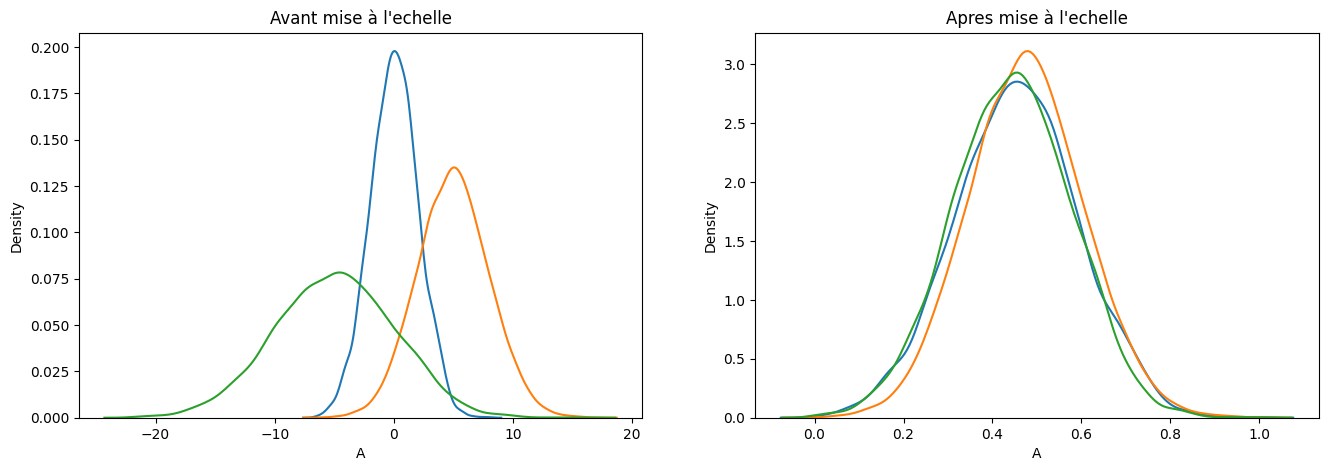

In [17]:
np.random.seed(1)
NBROWS = 5000
def plotGraph(pdf, pscaled_df):
    fig, (a, b) = plt.subplots(ncols=2, figsize=(16, 5))
    a.set_title("Avant mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pdf[col], ax=a)
    b.set_title("Apres mise à l'echelle")
    for col in pdf.columns:
        sns.kdeplot(pscaled_df[col], ax=b)
    plt.show()
df = pd.DataFrame({ 'A': np.random.normal(0, 2, NBROWS),
                    'B': np.random.normal(5, 3, NBROWS ),
                    'C': np.random.normal(-5, 5, NBROWS) })
scaler = MinMaxScaler()
keepCols = ['A', 'B', 'C']
scaled_df = scaler.fit_transform(df[keepCols] )
scaled_df = pd.DataFrame(scaled_df, columns=keepCols)
plotGraph(df[keepCols], scaled_df)

# Dataset split

In [22]:
train = pd.read_csv("train.csv")
X = train.drop(['Survived', 'Name', 'Sex', 'Ticket', 'Cabin', 'Embarked' ], axis=1)
X['Pclass'] = X['Pclass'].fillna(5)
X['Age'] = X['Age'].fillna(X['Age'].mean())
X['Fare'] = X['Fare'].fillna(X['Fare'].mean())
y = train['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print ("Train=" + str(X_train.shape) + ", Test=" + str(X_test.shape))

Train=(596, 6), Test=(295, 6)
